In [2]:
import pandas as pd


In [6]:
employees = pd.read_csv('employees.csv')
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


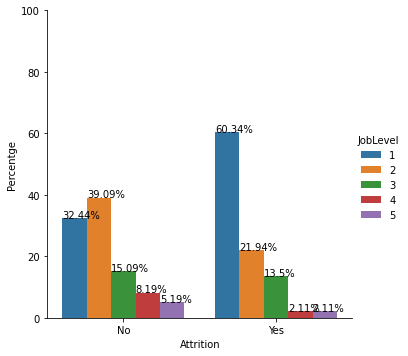

In [36]:
from unicodedata import normalize
import seaborn as sns
x , y = 'Attrition' , 'JobLevel'
employees1 = employees.groupby(x)[y].value_counts(normalize = True)
employees1 = employees1.mul(100)
employees1 = employees1.rename('Percentge').reset_index()

g = sns.catplot(x = x, y = 'Percentge',  hue = y , kind = 'bar', data =employees1 )
g.ax.set_ylim(0, 100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2)) + '%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x, txt_y, txt)

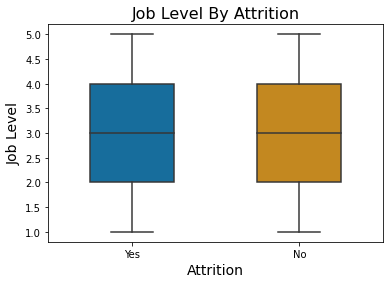

In [37]:
bplot=sns.boxplot(y='JobLevel', x='Attrition', 
                 data=employees1.sort_values('Percentge'), 
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Job Level By Attrition", fontsize=16) 
bplot.set_xlabel("Attrition", fontsize=14)
bplot.set_ylabel("Job Level", fontsize=14) 
bplot.tick_params(labelsize=10)

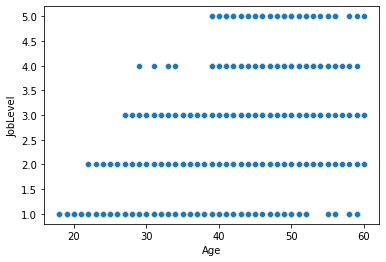

In [43]:
sns.scatterplot(data=employees ,x = 'Age', y = 'JobLevel')

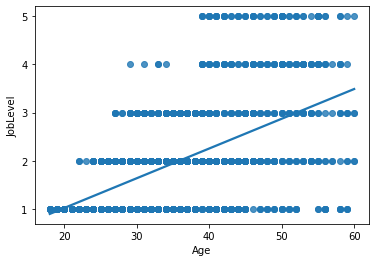

In [45]:
sns.regplot(employees['Age'], employees['JobLevel'], ci=None)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


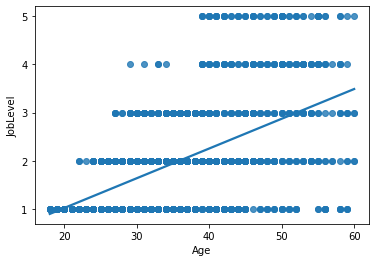

In [46]:
sns.regplot(employees['Age'], employees['JobLevel'], ci=None)

In [29]:

employees1.loc[:,['JobLevel', 'Attrition']].groupby('Attrition').mean().sort_values('JobLevel')

,JobLevel
Attrition,
No,3.0
Yes,3.0
